In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tifffile

In [13]:
os.listdir(os.path.join(os.getcwd(),'kidney'))

['.DS_Store',
 'test',
 'train',
 'train.csv',
 'HuBMAP-20-dataset_information.csv']

In [3]:
df_train=pd.read_csv(os.path.join(os.getcwd(),'kidney/train.csv'))
df_info=pd.read_csv(os.path.join(os.getcwd(),'kidney/HuBMAP-20-dataset_information.csv'))

In [4]:
small_ids = ['2f6ecfcdf', 'aaa6a05cc', 'cb2d976f4', '0486052bb', 'e79de561c',
       '095bf7a1f', '54f2eec69', '1e2425f28']
small_images = []
small_masks =[]

In [5]:
image_id ='0486052bb'

In [6]:
def rle2mask(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [
     np.asarray(x,dtype =int) for x in (s[0:][::2],s[1:][::2]) 
     ]
    starts -=1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1],dtype = np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi]=1
    return img.reshape(shape).T
def read_image(image_id, scale=None,verbose=1):
    image = tifffile.imread(os.path.join(os.getcwd(),
                                         f'kidney/train/{image_id}.tiff'))
    if len(image.shape)==5:
        image= image.squeeze().transpose(1,2,0)
    mask = rle2mask(
        df_train[df_train["id"] == image_id]["encoding"].values[0], 
        (image.shape[1],image.shape[0])
    )
    if verbose:
        print(f'[{image_id}] Image shape:{image.shape}')
        print(f'[{image_id}] Mask shape:{mask.shape}')
    
    if scale:
        new_size = (image.shape[1]//scale,image.shape[0]//scale)
        image = cv2.resize(image,new_size)
        mask= cv2.resize(mask,new_size)
        
        if verbose:
            print(f'[{image_id}] Resized Image shape:{image.shape}')
            print(f'[{image_id}] Resized Mask shape:{mask.shape}')
    return image,mask
def read_test_image(image_id, scale=None,verbose=1):
    image = tifffile.imread(os.path.join(os.getcwd(),
                                         f'kidney/test/{image_id }.tiff'))
    if len(image.shape)==5:
        image= image.squeeze().transpose(1,2,0)

    if verbose:
        print(f'[{image_id}] Image shape:{image.shape}')
    
    if scale:
        new_size = (image.shape[1]//scale,image.shape[0]//scale)
        image = cv2.resize(image,new_szie)
        
        if verbose:
            print(f'[{image_id}] Resized Image shape:{image.shape}')
    return image

def plot_image_and_mask(image,mask,image_id):
    plt.figure(figsize=(16,10))
    
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title(f'Image {image_id}',fontsize=18)
    
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.imshow(mask,cmap='hot',alpha=0.5)
    plt.title(f'Image {image_id} +mask',fontsize=18)
    
    plt.subplot(1,3,3)
    plt.imshow(mask,cmap='hot')
    plt.title(f'Mask',fontsize=18)
    plt.show()
    
def plot_grid_image_with_mask(image, mask):
    plt.figure(figsize=(16, 16))
    
    w_len = image.shape[0]
    h_len = image.shape[1]
    
    min_len = min(w_len, h_len)
    w_start = (w_len - min_len) // 2
    h_start = (h_len - min_len) // 2
    
    plt.imshow(image[w_start : w_start + min_len, h_start : h_start + min_len])
    plt.imshow(
        mask[w_start : w_start + min_len, h_start : h_start + min_len], cmap="hot", alpha=0.5,
    )
    plt.axis("off")
            
    plt.show()
    
def plot_slice_image_and_mask(image, mask, start_h, end_h, start_w, end_w):
    plt.figure(figsize=(16, 5))
    
    sub_image = image[start_h:end_h, start_w:end_w, :]
    sub_mask = mask[start_h:end_h, start_w:end_w]
    
    plt.subplot(1, 3, 1)
    plt.imshow(sub_image)
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(sub_image)
    plt.imshow(sub_mask, cmap="hot", alpha=0.5)
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(sub_mask, cmap="hot")
    plt.axis("off")
    
    plt.show()

In [7]:
for small_id in small_ids:
    tmp_image,tmp_mask = read_image(small_id,scale=20,verbose=0)
    small_images.append(tmp_image)
    small_masks.append(tmp_mask)

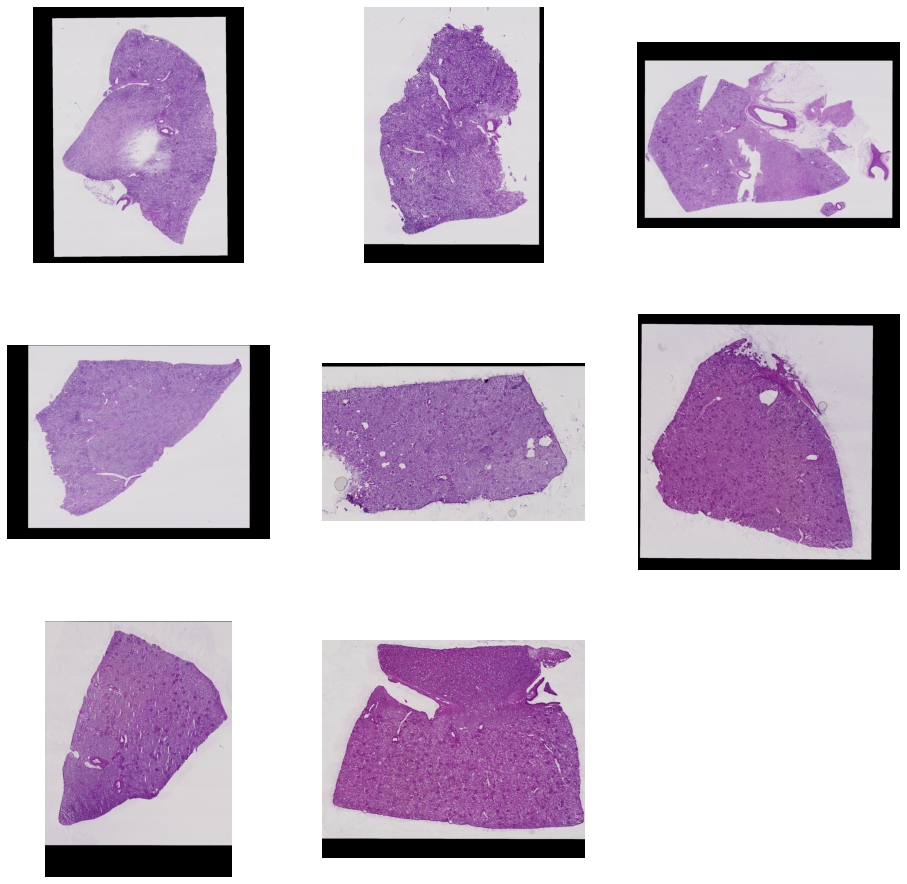

In [8]:
plt.figure(figsize=(16,16))
for ind,(tmp_id,tmp_image) in enumerate(zip(small_ids,small_images)):
    plt.subplot(3,3,ind+1)
    plt.imshow(tmp_image)
    plt.axis('off')

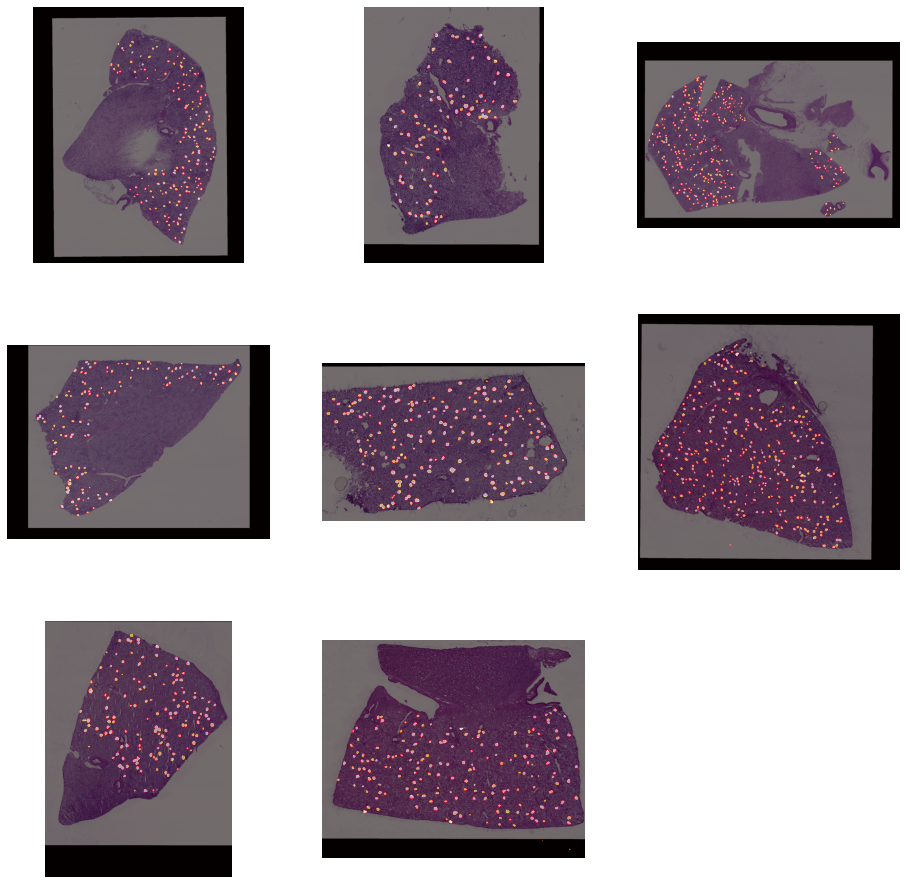

In [9]:
plt.figure(figsize=(16,16))
for ind,(tmp_id,tmp_image,tmp_mask) in enumerate(zip(small_ids,small_images,small_masks)):
    plt.subplot(3,3,ind +1)
    plt.imshow(tmp_image)
    plt.imshow(tmp_mask,cmap='hot',alpha=0.5)
    plt.axis('off')

In [10]:
image_id ='0486052bb'
image,mask = read_image(image_id,2)

[0486052bb] Image shape:(25784, 34937, 3)
[0486052bb] Mask shape:(25784, 34937)
[0486052bb] Resized Image shape:(12892, 17468, 3)
[0486052bb] Resized Mask shape:(12892, 17468)


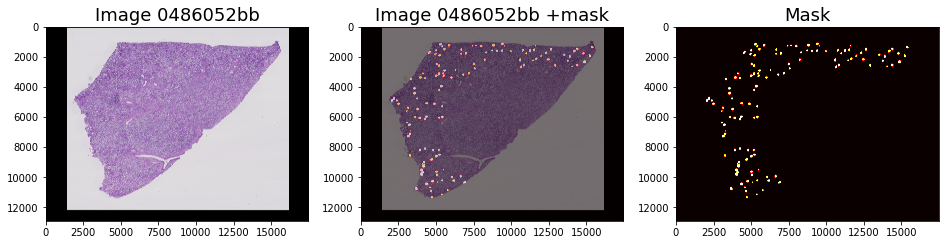

In [11]:
plot_image_and_mask(image,mask,image_id)

In [12]:
pd.read_json(os.path.join(os.getcwd(),'kidney/train/0486052bb.json'))

,type,id,geometry,properties
0,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[4747, 96...","{'classification': {'name': 'glomerulus', 'col..."
1,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[6631, 67...","{'classification': {'name': 'glomerulus', 'col..."
2,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[6287, 10...","{'classification': {'name': 'glomerulus', 'col..."
3,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[6579, 13...","{'classification': {'name': 'glomerulus', 'col..."
4,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[8779, 11...","{'classification': {'name': 'glomerulus', 'col..."
...,...,...,...,...
121,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[23073, 2...","{'classification': {'name': 'glomerulus', 'col..."
122,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[20891, 5...","{'classification': {'name': 'glomerulus', 'col..."
123,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[15277, 2...","{'classification': {'name': 'glomerulus', 'col..."
124,Feature,PathAnnotationObject,"{'type': 'Polygon', 'coordinates': [[[7172, 85...","{'classification': {'name': 'glomerulus', 'col..."


In [18]:
df_info['split']='test'
df_info.loc[df_info.image_file.isin(
os.listdir(os.path.join(os.getcwd(),'kidney/train'))),'split']='train'
df_info['area']=df_info.width_pixels*df_info.height_pixels

In [44]:
col_list=['race','ethnicity', 'sex', 'age', 'weight_kilograms',
       'height_centimeters', 'bmi_kg/m^2', 'laterality', 'percent_cortex',
       'percent_medulla',  'area']

In [ ]:
for i, col in enumerate(col_list):
    plt.subplot(6,2,i+1)

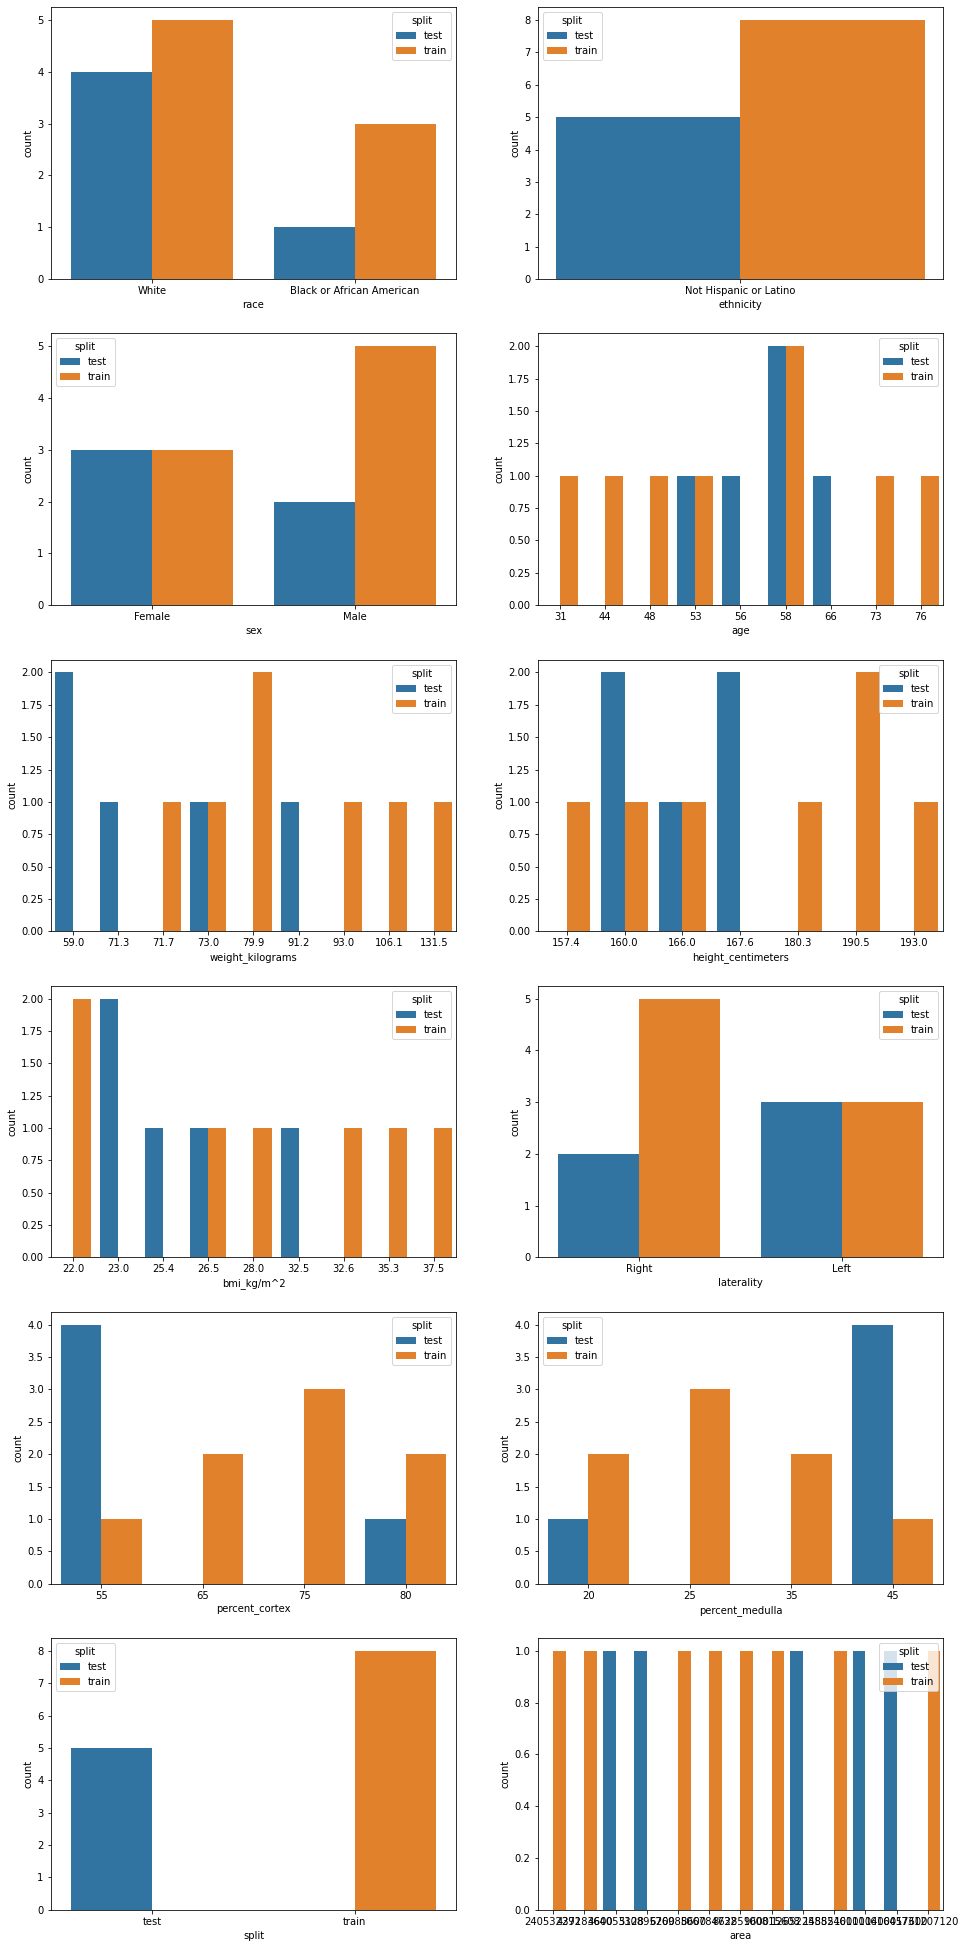

In [43]:
plt.figure(figsize=(16,35))
for i, col in enumerate(col_list):
    plt.subplot(6,2,i+1)
    sns.countplot(x=col,hue='split',data=df_info)
    
        